<a href="https://colab.research.google.com/github/2003006/-test-for-hypothyroidism/blob/main/test_for_hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*Test for hypothyroidism analysis of data obtained from a clinical-camp conducted at Nairobi-Hospital.*</font>

# Python Classification_Programming:
***Decision_Trees_and _SVM***

# DEFINING THE QUESTION

## a) ***Specifying the Data Analytic Question***

>Build a model to predict whether the patient has hypothyroid based on the given patient's symptoms tests.

##b) ***Defining the Metric for Success***

>1.A boosted decision tree model with accuracy score above 90 % 

>2.A support Vector Machine model  with accuracy score above 90 % 

##c) ***Understanding the context***

Hypothyroidism: (Underactive Thyroid) Too Little Thyroid Hormone Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##d) ***Recording the Experimental Design***

* Data preparation
* Data analysis
* Data modeling

##e) Data Relevance



>* The provided data was appropriate for the classification analysis that was needed.

# IMPORTING REQUIRED LIBRARIES


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# LOADING THE DATASET

In [208]:
df = pd.read_csv("/content/hypothyroid.csv")


# PREVIWEING THE DATASET

In [209]:
#previewing the head
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [210]:
#previwing the tail
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


# GETTING THE DATASET INFO

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [212]:
#checking for unique values in every column
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [213]:
#Checking the basic data statistics
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [214]:
df.shape

(3163, 26)

# DATA CLEANING

##***Validity***

## ***Completeness***

In [215]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## ***Consistency***

In [216]:
#checking for duplicates
df.duplicated().sum()

77

In [217]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

## ***Uniformity***

In [218]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [219]:
#converting the sex column to lowercase
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [220]:
df.shape

(3086, 26)

In [221]:
#replacing the '?' in the sex column with the mode and confirming if it was changed
df['age']=df['age'].replace(['?'],np.nan)
df['tsh']=df['tsh'].replace(['?'],np.nan)
df['t3']=df['t3'].replace(['?'],np.nan)
df['tt4']=df['tt4'].replace(['?'],np.nan)
df['t4u']=df['t4u'].replace(['?'],np.nan)
df['fti']=df['fti'].replace(['?'],np.nan)
df['tbg']=df['tbg'].replace(['?'],np.nan)


In [222]:
df.shape

(3086, 26)

In [223]:
df.replace(['?'],np.nan)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [224]:
#coverting data from string to numeric
df[['age','tsh','t3','tt4','t4u','fti','tbg']] = df[['age','tsh','t3','tt4','t4u','fti','tbg']].apply(pd.to_numeric)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

In [225]:
df.shape

(3086, 26)

In [226]:
df.head(50)
df.tbg.unique()

array([  nan,  28. ,  34. ,   0. ,  19. ,  30. ,  25. ,  48. ,  39. ,
        31. ,  16. ,  21. ,  37. ,  40. ,  27. ,   3.1,  38. , 108. ,
        20. ,  36. ,  17. ,  23. ,  35. ,  32. ,  63. ,   9.3,  15. ,
        26. ,  33. ,  41. , 110. ,  22. ,  43. ,  53. ,  80. ,  47. ,
        29. ,  13. ,  24. ,  18. ,  45. ,  86. ,  50. ,   8.4,  52. ,
        11. ,  12. ,  14. ,  65. ,   7.3,   8.5,  69. , 122. ])

# ENCODING CATEGORICAL VARIABLES

In [227]:
#Label encoding  
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = df.columns[categorical_feature_mask].tolist()
categorical_features

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'tsh_measured',
 't3_measured',
 'tt4_measured',
 't4u_measured',
 'fti_measured',
 'tbg_measured']

In [228]:
df.shape

(3086, 26)

In [229]:
#getting the length of categorical_features
len(categorical_features)

19

In [230]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
df['status']= label_encoder.fit_transform(df['status'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['on_thyroxine']= label_encoder.fit_transform(df['on_thyroxine'])
df['query_on_thyroxine']= label_encoder.fit_transform(df['query_on_thyroxine'])
df['on_antithyroid_medication']= label_encoder.fit_transform(df['on_antithyroid_medication'])
df['thyroid_surgery']= label_encoder.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid']= label_encoder.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid']= label_encoder.fit_transform(df['query_hyperthyroid'])  
df['pregnant']= label_encoder.fit_transform(df['pregnant'])
df['sick']= label_encoder.fit_transform(df['sick'])
df['tumor']= label_encoder.fit_transform(df['tumor'])
df['lithium']= label_encoder.fit_transform(df['lithium'])
df['goitre']= label_encoder.fit_transform(df['goitre'])
df['tsh_measured']= label_encoder.fit_transform(df['tsh_measured'])
df['t3_measured']= label_encoder.fit_transform(df['t3_measured'])
df['tt4_measured']= label_encoder.fit_transform(df['tt4_measured'])
df['t4u_measured']= label_encoder.fit_transform(df['t4u_measured'])
df['fti_measured']= label_encoder.fit_transform(df['fti_measured'])
df['tbg_measured']= label_encoder.fit_transform(df['tbg_measured'])
df['tsh']= label_encoder.fit_transform(df['tsh'])
df['t3']= label_encoder.fit_transform(df['t3'])
df['tt4']= label_encoder.fit_transform(df['tt4'])
df['t4u']= label_encoder.fit_transform(df['t4u'])
df['fti']= label_encoder.fit_transform(df['fti'])
df['tbg']= label_encoder.fit_transform(df['tbg'])
df['age']= label_encoder.fit_transform(df['age'])


df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,69,2,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19,0,303
1,0,12,1,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,26,1,81,1,26,0,1897
2,0,21,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0,0,1898
3,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,8,1,72,1,9,0,1899
4,0,74,2,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48,0,1900


In [231]:
df.shape

(3086, 26)

# EXPLORATORY ANALYSIS

## UNIVARIATE ANALSIS

In [232]:
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,0.954310,85.352560,1.266040,0.144524,0.017822,0.013610,0.033377,0.076150,0.076150,0.019767,0.031432,0.012962,0.000648,0.031108,0.852560,105.933247,0.77965,105.772845,0.922229,135.273493,0.922553,82.132858,0.922878,137.254699,0.081335,1351.417045
std,0.208846,104.763852,0.492597,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,164.954463,0.41455,185.654589,0.267854,85.642760,0.267342,63.278944,0.266829,87.157344,0.273393,878.470840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,16.000000,1.000000,91.000000,1.000000,54.000000,1.000000,95.000000,0.000000,572.250000
50%,1.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.000000,1.00000,22.000000,1.000000,113.000000,1.000000,66.000000,1.000000,113.000000,0.000000,1343.500000
75%,1.000000,71.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,105.000000,1.00000,39.000000,1.000000,144.000000,1.000000,78.000000,1.000000,141.000000,0.000000,2114.750000
max,1.000000,529.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693.000000,1.00000,748.000000,1.000000,507.000000,1.000000,396.000000,1.000000,517.000000,1.000000,2886.000000


## BIVARIATE ANALSIS

###***Heatmap***

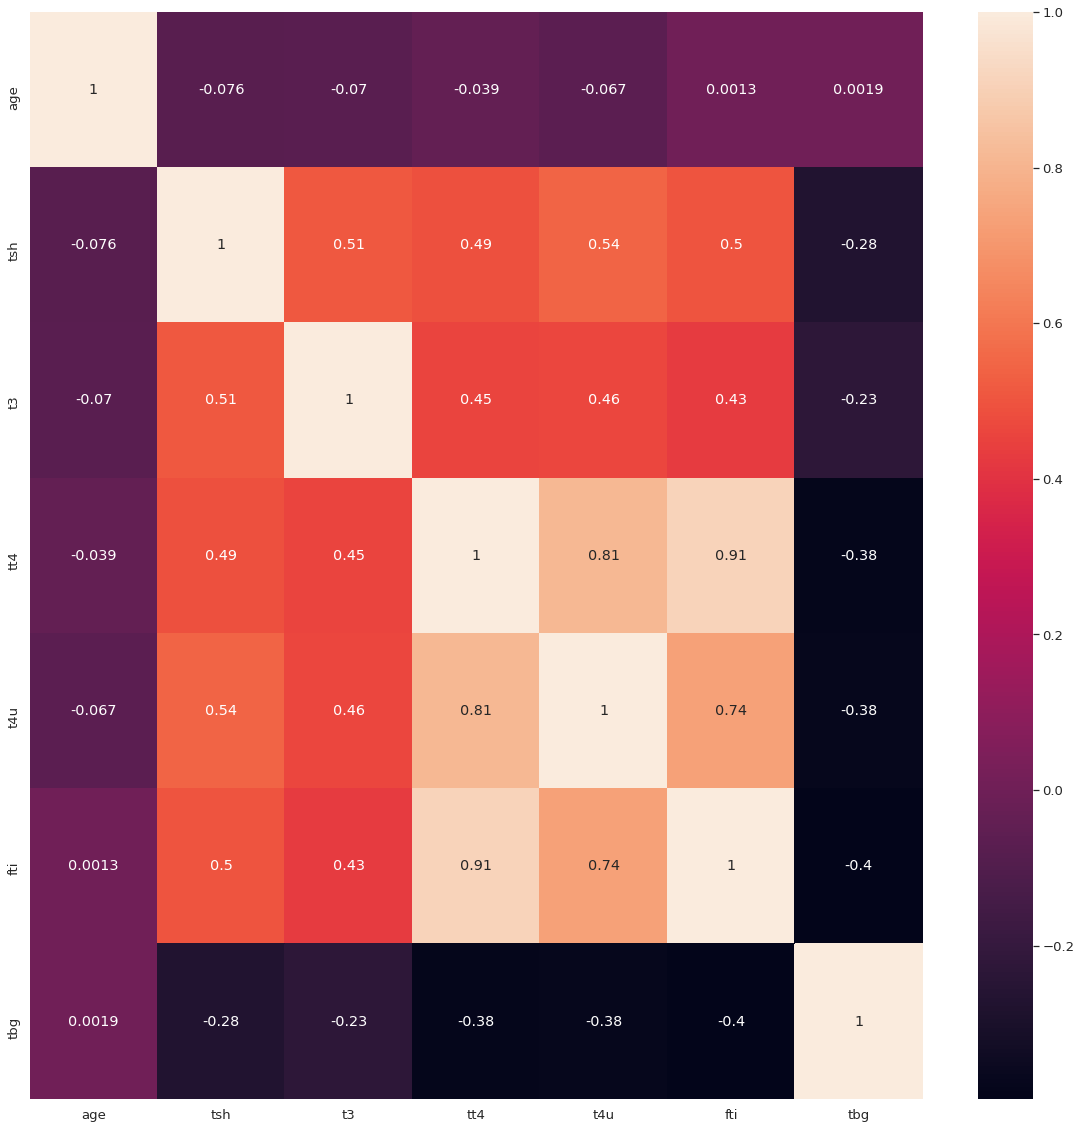

In [233]:
#correlation matrix
#  showing correlation on a heatmap
columns =['age','tsh','t3','tt4','t4u','fti','tbg']
plt.figure(figsize=(20,20))
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

### ***Pairplot***

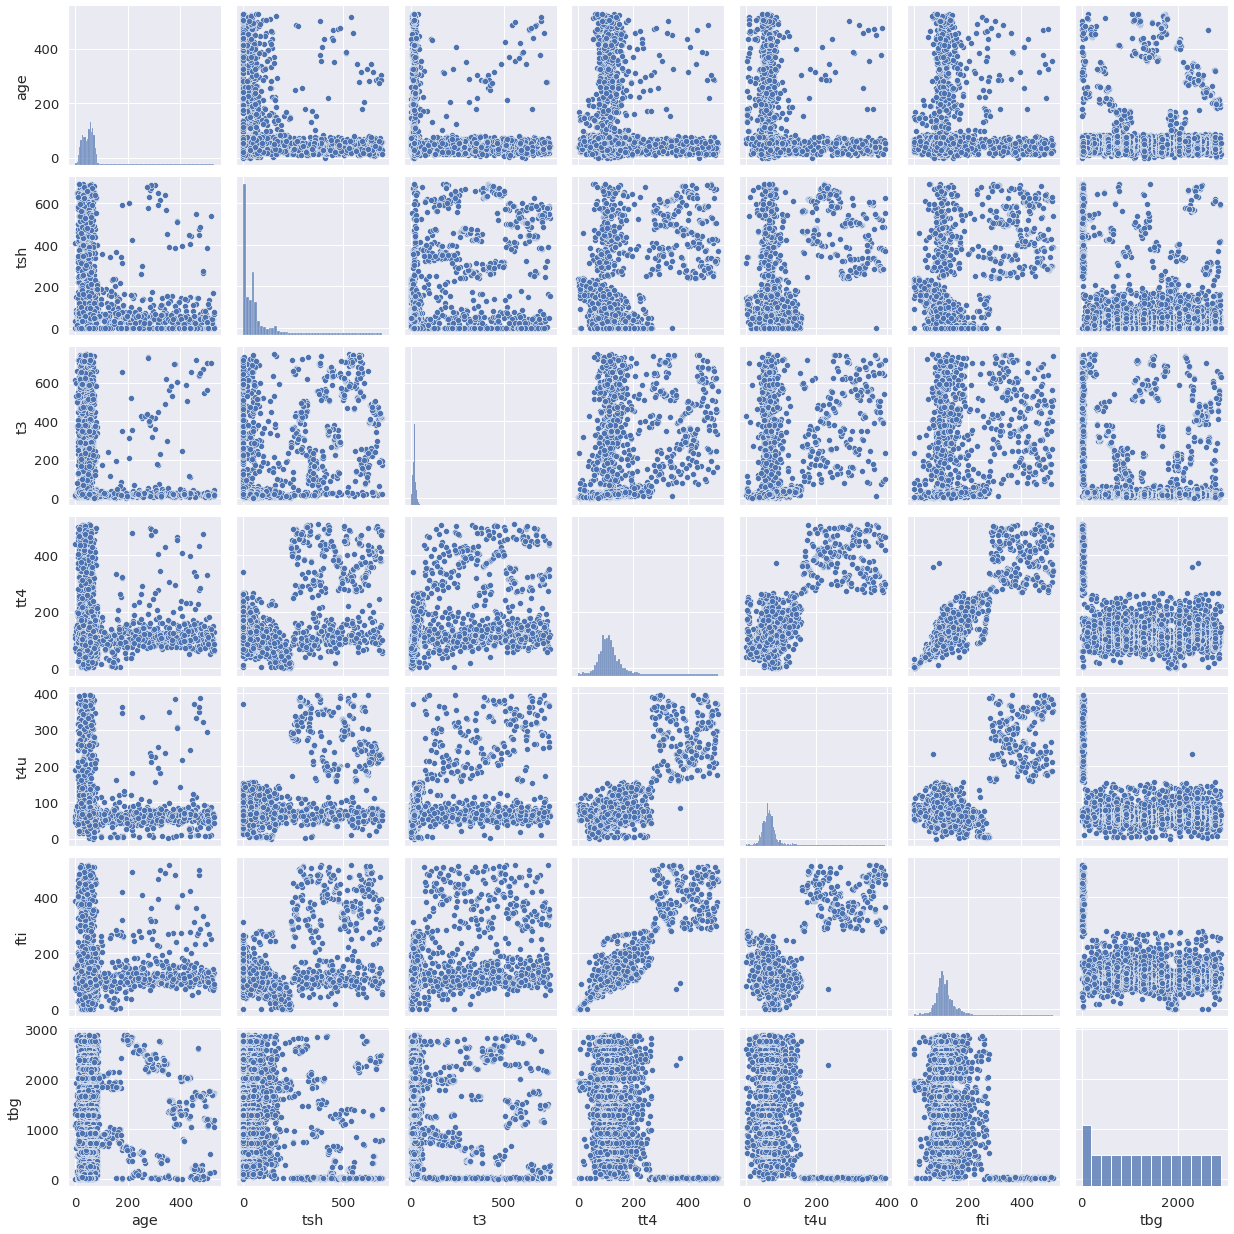

In [234]:
columns =['age','tsh','t3','tt4','t4u','fti','tbg']
sns.pairplot(df[columns])

<function matplotlib.pyplot.show>

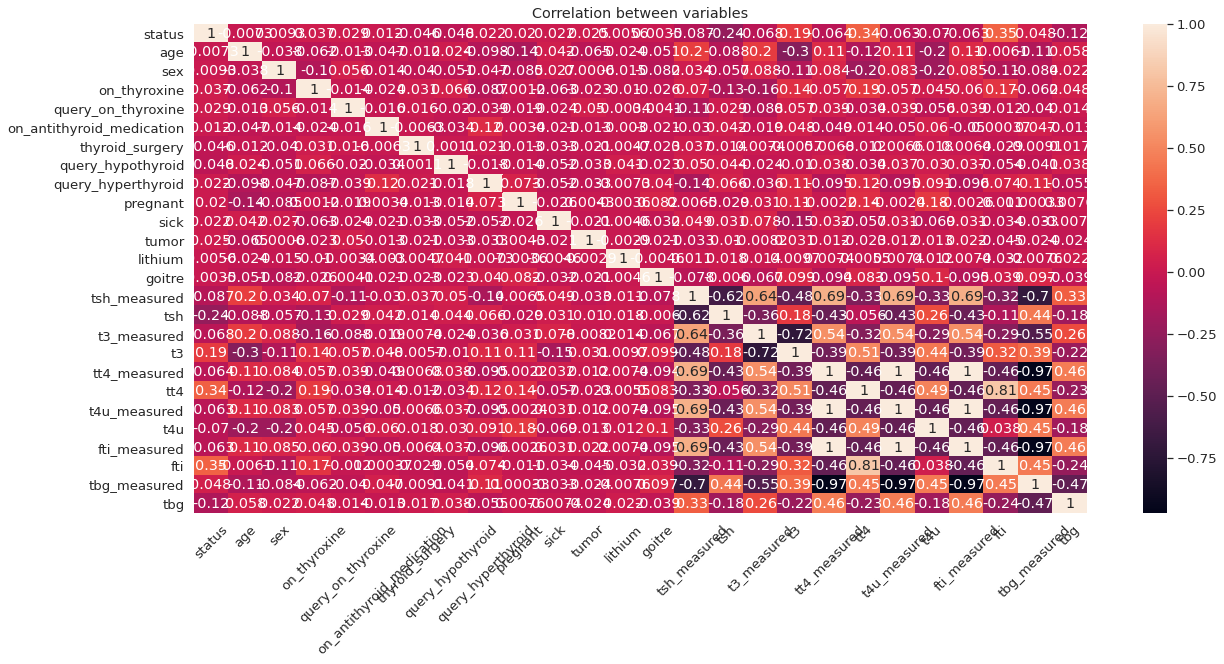

In [235]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
correlation_matrix=df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

In [236]:
df.shape

(3086, 26)

# IMPLEMENTING THE SOLUTION

## PART 1: DECISION TREES

### IMPORTING REQUIRED LIBRARIES

In [237]:
#importing required liraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### SPLITING THE DATASET

In [238]:

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg']
X = df[test_features].values

#splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



####1) ***Random Forest***

##### FITTING THE CLASSIFIER

In [239]:
from sklearn.tree import DecisionTreeClassifier
#fitting the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

##### VISUALIZING THE TREE

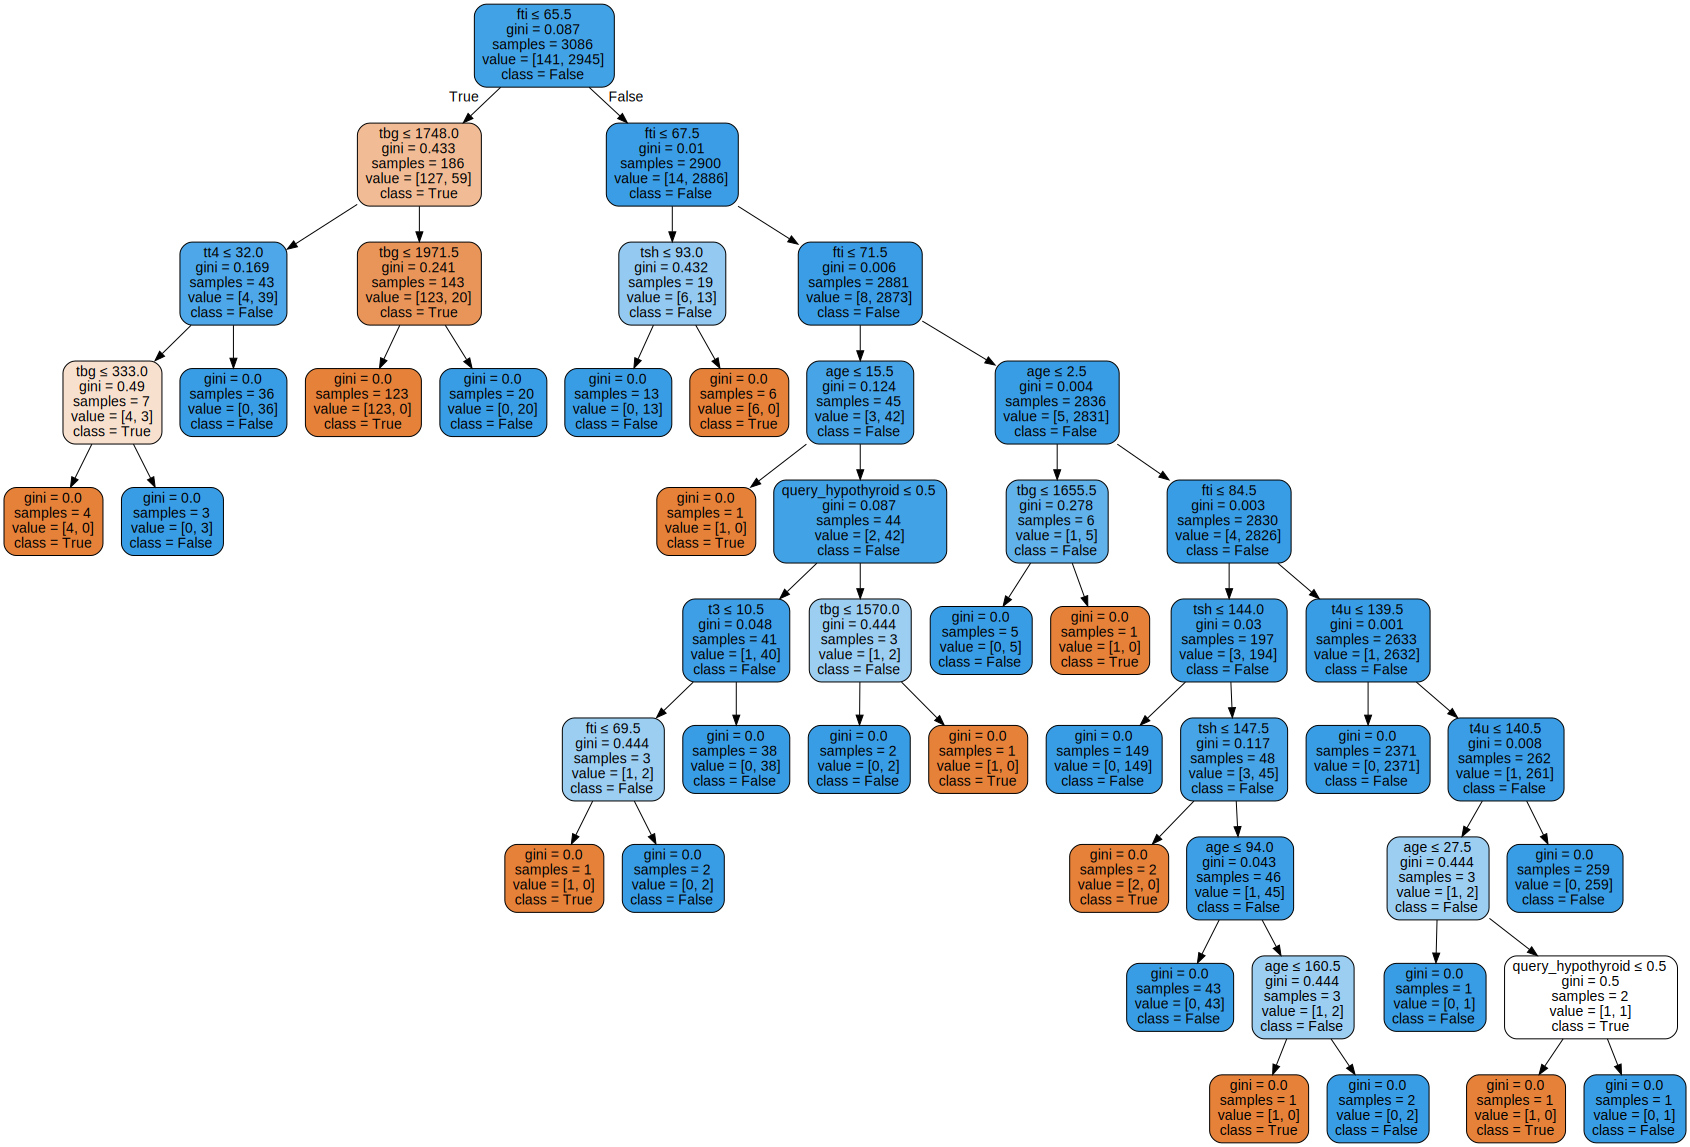

In [240]:
#visualizing the tree
import matplotlib.pyplot as plt
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = test_features,
                class_names=['True', 'False'],
                filled=True, rounded=True,
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

##### PREDICTING BASED ON THE MODEL TRAINED

In [241]:
# Predict based on the model we've trained
y_pred = clf.predict(X_test)

In [242]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.956803
std,0.200964,0.203409
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


##### GETTING THE ACCURACY OF THE MODEL

In [243]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.005399568034557235
Mean Squared Error: 0.005399568034557235
Root Mean Squared Error: 0.0734817530721555


In [244]:
from sklearn import metrics
# Model Accuracy, checks how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9946004319654428


In [245]:
print('The accuracy of Random Forest')
random_forest = "Accuracy: {}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(random_forest)

The accuracy of Random Forest
Accuracy: 99%


### FEATURE IMPORTANCE

#### ***GETTING THE IMPORTANT FEATURES***

In [246]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.0), ('t3_measured', 0.0), ('t3', 0.0), ('tt4_measured', 0.0), ('tt4', 0.01), ('t4u_measured', 0.0), ('t4u', 0.01), ('fti_measured', 0.0), ('fti', 0.59), ('tbg_measured', 0.0), ('tbg', 0.37)]

Variable: fti                  Importance: 0.59
Variable: tbg                  Importance: 0.37
Variable: age                  Importance: 0.01
Variable: tt4                  Importance: 0.01
Variable: t4u                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable:

#### ***VISUALIZING THE FEATURES***

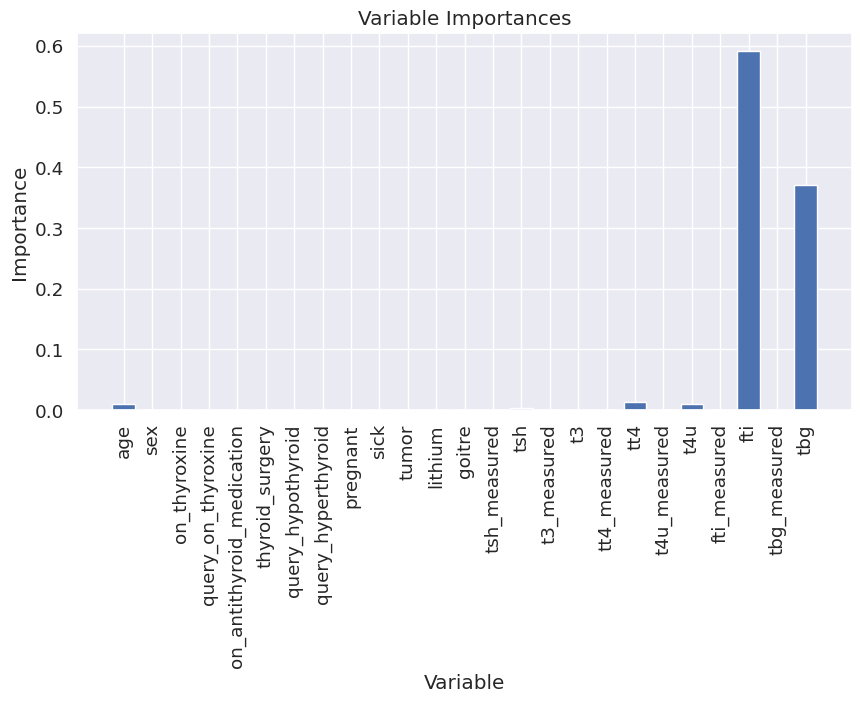

In [247]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

####2) Adaboost

##### IMPORTING REQUIRED LIBRARIES

In [248]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


##### FITTING THE MODEL

In [249]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [250]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

##### GETTING THE ACCURACY

In [251]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [252]:
print('The accuracy of Adaboost')
adaboost = "Accuracy: {}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(adaboost)

The accuracy of Adaboost
Accuracy: 100%


####3) ***Gradient Boosting***

##### IMPORTING REQUIRED LIBRARIES

In [253]:
#importing required libaries
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

##### SPLITTING THE DATASET

In [254]:
#splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

##### CONFUSION MATRIX AND CLASSIFICATION REPORT

In [255]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 22  17]
 [ 27 860]]
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        39
           1       0.98      0.97      0.98       887

    accuracy                           0.95       926
   macro avg       0.71      0.77      0.74       926
weighted avg       0.96      0.95      0.96       926



##### GETTING THE ACCURACY OF THE MODEL

In [256]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
accuracy=gb_clf.score(X_test, y_test)
#print("Learning rate: ", learning_rate)
#print("Accuracy score (training): {0:.12f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.12f}".format(accuracy))

Accuracy score (test): 0.952483801296


In [257]:
print('The accuracy of Gradient Boosting')
gradient_boosting = "Accuracy: {}%".format(int(round(accuracy * 100)))
print(gradient_boosting)

The accuracy of Gradient Boosting
Accuracy: 95%


### REVIEWING SOLUTION FOR MODELS IN PART1

In [258]:
# Reviewing the Solution 
# Models vs accuracy.
models = ['Random Forest', 'Adaboost', 'Gradient Boosting']
accuracy_of_models = [random_forest,adaboost,gradient_boosting]
model_results = pd.DataFrame({'Model': models, 'Accuracy of Models': accuracy_of_models})
print(model_results)

               Model Accuracy of Models
0      Random Forest      Accuracy: 99%
1           Adaboost     Accuracy: 100%
2  Gradient Boosting      Accuracy: 95%


In [259]:
#split the dataframe Accuracy of model to get the accuracy itself
new = model_results['Accuracy of Models'].str.split(":",n=1,expand =True)
model_results['accuracy'] = new[1]
model_results.drop(['Accuracy of Models'],axis=1,inplace=True)

In [260]:
#viewing the dataframe
model_results

,Model,accuracy
0,Random Forest,99%
1,Adaboost,100%
2,Gradient Boosting,95%


In [261]:
#change accuracy from object to float
model_results['accuracy']= (model_results['accuracy'].str.strip('%').astype(float))/100
#get the mean of the models
x = model_results['accuracy'].mean()
print("The mean of accuracy of the models is:", model_results['accuracy'].mean())

The mean of accuracy of the models is: 0.98


In [262]:
print('The mean accuracy of all models of PART1 ')
print("Accuracy of all models of PART1 is : {}%".format(int(round(x * 100))))

The mean accuracy of all models of PART1 
Accuracy of all models of PART1 is : 98%


## PART 2: SVM

### Fitting the model: Linear Kernel, Polymomial Kernel,Rbf Kernel,Sigmoid Kernel 

#### LOADING REQUIRED LIBRARIES

In [263]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

#### FITTING THE MODELS

In [292]:
#fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 0)

In [293]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

#### VIZUALISING THE MODELS

In [59]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

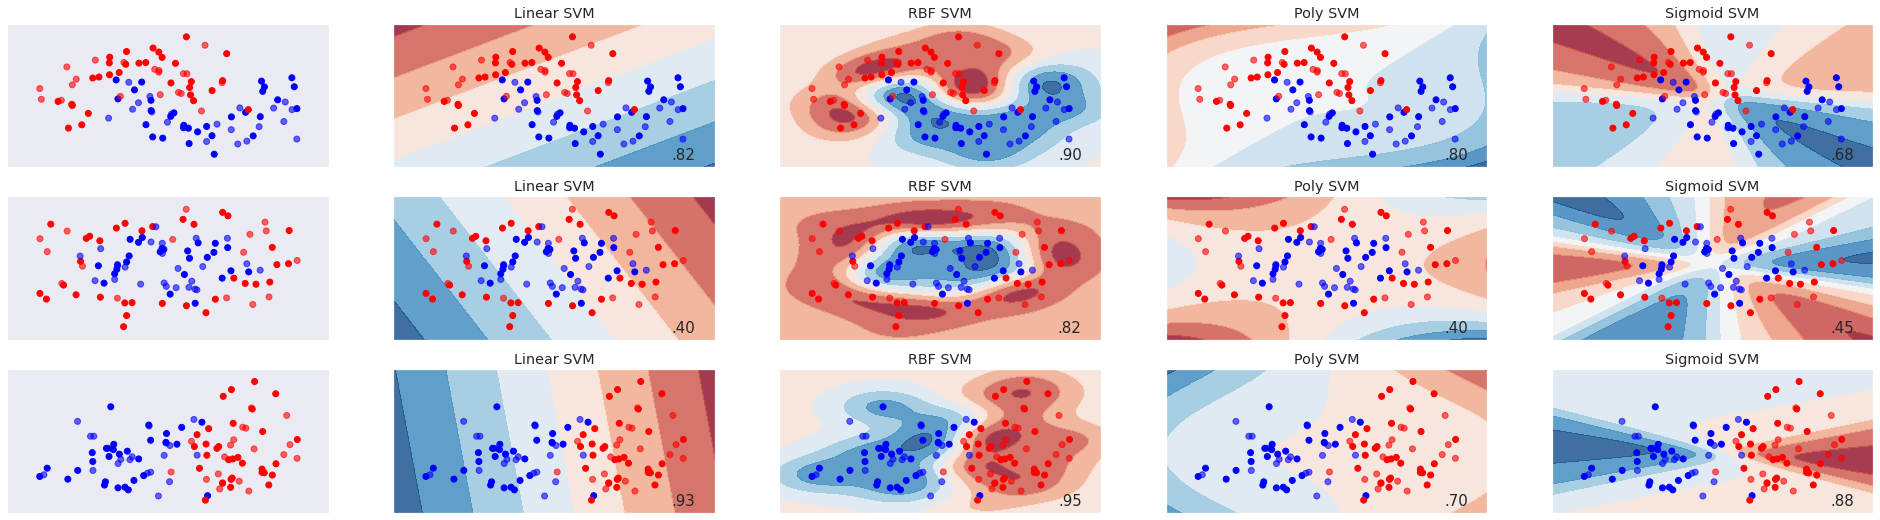

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

#### ACCURACY OF THE MODELS

In [295]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [301]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)


print("Accuracy of Linear Kernel:")
linear_kernel="Accuracy:{}%".format(int(accuracy_lin*100))
print(linear_kernel)


print("Accuracy of Polynomial Kernel:")
polynomial_kernel="Accuracy:{}%".format(int(accuracy_poly*100))
print(polynomial_kernel)


print("Accuracy of rbf Kernel:")
rbf_kernel="Accuracy:{}%".format(int(accuracy_rbf*100))
print(rbf_kernel)

print("Accuracy of Sigmoid Kernel:")
sigmoid_kernel="Accuracy:{}%".format(int(accuracy_sig*100))
print(sigmoid_kernel)


Accuracy of Linear Kernel:
Accuracy:98%
Accuracy of Polynomial Kernel:
Accuracy:95%
Accuracy of rbf Kernel:
Accuracy:95%
Accuracy of Sigmoid Kernel:
Accuracy:95%


#### CONFUSION MATRIX

In [65]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[18  1]
 [ 2 19]]
[[17  2]
 [ 1 20]]
[[18  1]
 [ 1 20]]
[[18  1]
 [ 4 17]]


#### VISUALIZING CONFUSION MATRIX WITH SEABORN

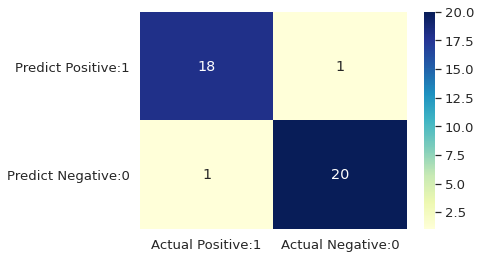

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_rbf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

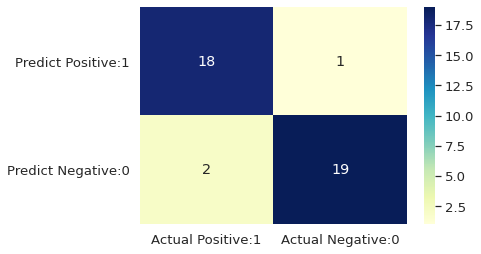

In [69]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_lin, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

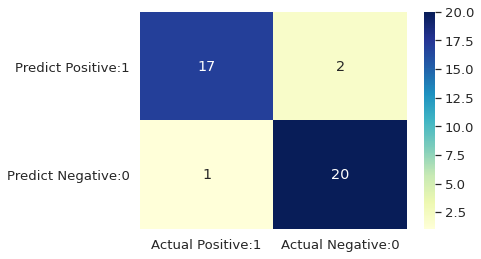

In [70]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_poly, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

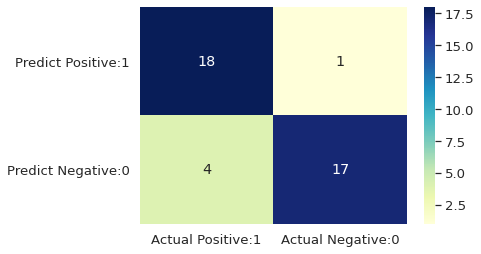

In [71]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_sig, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

###REVIEWING THE SOLUTION FOR MODELS IN PART 2

In [310]:
# Reviewing the Solution 
# Models vs accuracy.
models = ['Linear Kernel', 'Polynomial Kernel', 'Radial Kernel','Sigmoid Kernel']
accuracy_of_models = [linear_kernel,polynomial_kernel,rbf_kernel,sigmoid_kernel]
model_result = pd.DataFrame({'Model': models, 'Accuracy of Models': accuracy_of_models})
print(model_result)

               Model Accuracy of Models
0      Linear Kernel       Accuracy:98%
1  Polynomial Kernel       Accuracy:95%
2      Radial Kernel       Accuracy:95%
3     Sigmoid Kernel       Accuracy:95%


In [311]:
#split the dataframe Accuracy of model to get the accuracy itself
new = model_result['Accuracy of Models'].str.split(":",n=1,expand =True)
model_result['accuracy'] = new[1]
model_result.drop(['Accuracy of Models'],axis=1,inplace=True)

In [312]:
#viewing the dataframe
model_result

,Model,accuracy
0,Linear Kernel,98%
1,Polynomial Kernel,95%
2,Radial Kernel,95%
3,Sigmoid Kernel,95%


In [313]:
#change accuracy from object to float
model_result['accuracy']= (model_result['accuracy'].str.strip('%').astype(float))/100
#get the mean of the models
x = model_result['accuracy'].mean()
print("The mean of accuracy of the models in PART2:SVM is:", model_result['accuracy'].mean())

The mean of accuracy of the models in PART2:SVM is: 0.9575


In [314]:
print('The accuracy of all models')
print("Accuracy of all models is : {}%".format(int(round(x * 100))))

The accuracy of all models
Accuracy of all models is : 96%


# CHALLENGING THE SOLUTION

> The models performance for both decision trees and Support Vector Machines was above 95%.This is an indication of overfitting.

                        DECISION TREES
    Gradient Boosted Decision Tree: 95%	
    RandomForestClassifier:         99%
    AdaBoostClassifier:             100%
    Avg(accuracy of Decision Trees):99%


                          SVM
    Linear Kernel                   98%
    Polynomial Kernel               95%
    Rbf Kernel                      95%
    Sigmoid Kernel                  95%
    Avg(accurate of SVM Models)     96%
    

> **Causes of overfitting**

> This was due to imbalanced classes as detected in the SVM

# FOLLOW UP QUESTIONS

##a) ***Did we have the right data?***

> **NO: There was class imbalance**

##b) ***Do we need other data to answer our question?***
**Yes: Data with balanced classes**

##c) Did we have the right question?
**Yes**